Jonatan Baumgartner

Massimo De Santis

Florain Feuillade

# Exercise 1 - Classification to predict student admission

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import math

## Exercise steps

### a. Logistic regression classifier with linear decision boundary

#### a) Read the data from file

In a similar way as for the exercise of the previous week, read the training data from file `student-dataset-train.csv`. The first two columns are $x_{1}$ and $x_{2}$. The last column holds the class label $y$. Build the design matrix $X$ as follow:

<center>$X = \left(\begin{array}{ccc} 
        1 &   x_{1,1} & x_{1,2} \\
        1 &   \vdots  & \vdots  \\
        1 &   x_{N,1} & x_{N,2}
           \end{array}\right)$</center>

Check that the shape of $X$ is (100,3) and that the shape of $y$ is (100,).

In [2]:
df = pd.read_csv("student-dataset-train.csv", header=None)
df.head()

X = df.drop(columns=2)
y = df[2]

X.insert(0, 2, np.ones(100), True)

print(np.shape(X))
print(np.shape(y))

(100, 3)
(100,)


#### b) Implement a z-norm normalization of the training set

You need to store the normalization values $(\mu, \sigma)$ for later as they will be needed to normalize the test set.

In [3]:
mu = {}
sigma = {}
for column in range(2):
    mu[column] = X[column].mean()
    sigma[column] = X[column].std()
    X[column] = (X[column] - mu[column]) / sigma[column]
    
X.head

<bound method NDFrame.head of       2         0         1
0   1.0 -1.594216  0.635141
1   1.0 -1.817101 -1.201489
2   1.0 -1.531325  0.359483
3   1.0 -0.280687  1.080923
4   1.0  0.688062  0.490905
..  ...       ...       ...
95  1.0  0.917087 -0.960121
96  1.0 -1.201681  1.123720
97  1.0  1.730412  0.137407
98  1.0 -0.529558 -0.069422
99  1.0  0.469294  1.254269

[100 rows x 3 columns]>

#### c) Implement a sigmoid function $g(z) = \frac{1}{1+e^{-z}}$

Use numpy to compute the exp so that your function can take numpy arrays as input. Check your implementation by plotting the sigmoid function.

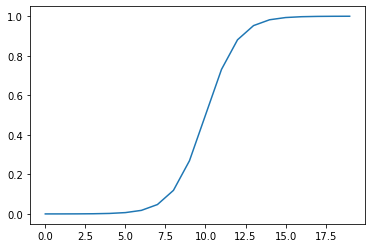

In [4]:
def g(z):
    return 1/(1+np.power(math.e, -z))
              
plt.plot(g(np.arange(-10, 10)))

#### d) Implement the hypothesis function $h_{\theta}(\mathbf{x})$

Hint: implement it so that the computation can take the full array $X$ with $h(\mathbf{x})$ broadcasted to all training samples.

In [5]:
def h(theta, x):
    return g(np.dot(x, theta))

#### e) Implement the objective function $J(\theta)$

<center>$J(\theta) = \frac{1}{N} \sum_{n=1}^{N} y_{n} \log h_{\theta}(\mathbf{x_{n}}) + (1-y_{n}) \log (1 - h_{\theta} (\mathbf{x_{n}}))$</center>

In [6]:
def j(theta, X, y):
    epsilon = 1e-6
    h1 = h(theta, X)
    N = len(X)
    return np.sum(y * np.log(h1 + epsilon) + (1-y) * np.log(1 - h1 + epsilon)) / N

#### f) Implement the gradient ascent

In a similar way as in PW02 and PW03, implement the gradient ascent with the update rule:

<center>$\theta_{i} \leftarrow \theta_{i} + \alpha \frac{1}{N} \sum_{n=1}^{N} (y_{n} - h_{\theta}(\mathbf{x}_{n})) x_{n,i}$</center>

In [7]:
def gradientAscent(X, y, learning_rate, num_epoch):
    N = X.shape[0]
    D = X.shape[1]
    theta = np.zeros(D)
    Js = np.zeros(num_epoch)
    for i in range(num_epoch):
        theta = theta + learning_rate * (y - h(theta, X)).dot(X) / N
        Js[i] = j(theta, X, y)
    
    return theta, Js

#### g) Test your implementation by running a gradient ascent

Hints: use a small $\alpha$. e.g. $0.001$,  store the evolution of the objective function $J(\theta)$ during the epochs to make a plot, use a large number of epochs, e.g. $2000000$.

In [8]:
theta, J = gradientAscent(X, y, 0.001, 20000)
print(theta)

2    0.669797
0    1.775948
1    1.602395
Name: 2, dtype: float64


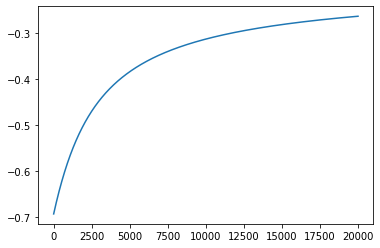

In [9]:
plt.plot(J)

#### h) Compute the correct classification rate on `student-dataset-test.csv`

Compute the correct classification rate on `student-dataset-test.csv` after convergence as you have an estimator of the posterior probabilities with:

<center>$P(y_{n}=1|\mathbf{x_{n}};\theta) = h_{\theta}(\mathbf{x_{n}})$</center>
<center>$P(y_{n}=0|\mathbf{x_{n}};\theta) = 1 - h_{\theta}(\mathbf{x_{n}})$</center>

This means that you can take the decisions $\hat{y}_{n} = 1$ if $h_{\theta}(\mathbf{x_{n}}) \geq 0.5$ and $\hat{y}_{n} = 0$ if $h_{\theta}(\mathbf{x_{n}}) < 0.5$.

In [10]:
df_test = pd.read_csv("student-dataset-test.csv", header=None)

X_test = df_test.drop(columns=2)
y_test = df_test[2]

X_test.insert(0, 2, np.ones(100), True)

X_test[0] = (X_test[0] - mu[0]) / sigma[0]
X_test[1] = (X_test[1] - mu[1]) / sigma[1]

h_test = h(theta, X_test)
h_final = h_test >= 0.5
correct = np.sum(h_final == y_test)
print(f"Correct : {correct}")
print(f"Percentage : {correct / len(X_test)}")

Correct : 89
Percentage : 0.89


#### i) Draw the decision boundary

Draw the decision boundary of your system on top of the scatter plot of the testing data.

c:\users\jonat\desktop\machle\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  # This is added back by InteractiveShellApp.init_path()


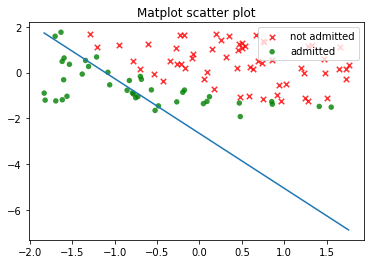

In [11]:
colors = ("red", "green")
markers = ('x', 'o')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data_train = np.c_[X[0], np.c_[X[1], y]]

not_admitted = np.array([data[:2] for data in data_train if data[2] == 0.0])
admitted = np.array([data[:2] for data in data_train if data[2] == 1.0])

not_admitted_graph = ax.scatter(admitted[:, 0], admitted[:, 1], alpha=0.8, c=colors[0], marker=markers[0], edgecolors='none', s=30)
admitted_graph = ax.scatter(not_admitted[:, 0], not_admitted[:, 1], alpha=0.8, c=colors[1], marker=markers[1], edgecolors='none', s=30)

x1 = np.linspace(min(data_train[:,0]), max(data_train[:,0]))
y1 = - (theta[0] + theta[1] * x1) / theta[2]
plt.plot(x1, y1)

plt.title('Matplot scatter plot')
plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.show()

#### j) Compare the performance

Compare the performance of the logistic regression system with the ones of previous's week.

Nous ne voyons pas de quelle autre système vous parlez.

### b. Optional - Stochastic gradient ascent

Redo the experiments of 2.a with a stochastic gradient ascent.

In [12]:
# Your code here

### c. Logistic regression classifier with non-linear decision boundary

Redo the experiments of 2.a by increasing the complexity of the model in order to have a non-linear decision boundary:

<center>$h_{\theta}(\mathbf{x}) = g(\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + \theta_{3} x_{1}^{2} + \theta_{4} x_{2}^{2} + \theta_{5} x_{1}x_{2} + \ldots)$</center>

In [13]:
x1_square = np.square(X[0])
x2_square = np.square(X[1])
x1_x2 = X[0] * X[1]
X.insert(3, 3, x1_square, True)
X.insert(4, 4, x2_square, True)
X.insert(5, 5, x1_x2, True)


x1_square_test = np.square(X_test[0])
x2_square_test = np.square(X_test[1])
x1_x2_test = X_test[0] * X_test[1]
X_test.insert(3, 3, x1_square_test, True)
X_test.insert(4, 4, x2_square_test, True)
X_test.insert(5, 5, x1_x2_test, True)

theta, J = gradientAscent(X, y, 0.001, 20000)
print(theta)


2    0.965673
0    1.742988
1    1.601195
3   -0.342576
4   -0.161001
5    0.000949
Name: 2, dtype: float64


In [15]:
h_test = h(theta, X_test)
h_final = h_test >= 0.5
correct = np.sum(h_final == y_test)
print(f"Correct : {correct}")
print(f"Percentage : {correct / len(X_test)}")

Correct : 91
Percentage : 0.91


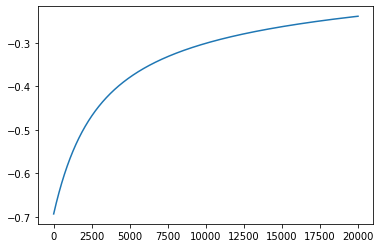

In [16]:
plt.plot(J)

c:\users\jonat\desktop\machle\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  # This is added back by InteractiveShellApp.init_path()
c:\users\jonat\desktop\machle\venv\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


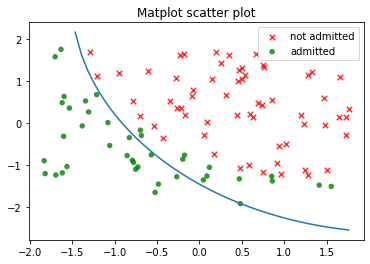

In [17]:
colors = ("red", "green")
markers = ('x', 'o')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data_train = np.c_[X[0], np.c_[X[1], y]]

not_admitted = np.array([data[:2] for data in data_train if data[2] == 0.0])
admitted = np.array([data[:2] for data in data_train if data[2] == 1.0])

not_admitted_graph = ax.scatter(admitted[:, 0], admitted[:, 1], alpha=0.8, c=colors[0], marker=markers[0], edgecolors='none', s=30)
admitted_graph = ax.scatter(not_admitted[:, 0], not_admitted[:, 1], alpha=0.8, c=colors[1], marker=markers[1], edgecolors='none', s=30)

x1 = np.linspace(min(data_train[:,0]), max(data_train[:,0]))

c = theta[0] + theta[1]*x1 + theta[3]*(x1**2)
b = theta[2] + theta[5] * x1
a = theta[4]

y1 = (-b + (np.sqrt(b**2 - 4*a*c)))/(2*a)
plt.plot(x1, y1)

plt.title('Matplot scatter plot')
plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.show()

### d. Using SciKit Learn

Redo one of the exercise a. or c. using SciKit Learn.

1. Read the documentation of the function `SGDClassifier()` available in the toolkit SciKit Learn. This function implements stochastic gradient descent training for different linear systems such as Logistic Regression. For a logistic regression, the `loss` parameter should be set to `"log"`.
1. Use the `fit()` and `predict()` methods of this classifier on the student data.
1. Compute the performances and compare it to your own implementations.

In [14]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score


clf = linear_model.SGDClassifier(loss='log', max_iter=1000000, tol=1e-6)

clf.fit(X, y)

prediction = clf.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, prediction))

accuracy_score:  0.9
